**Introduction**

Machine learning has transformed numerous industries by enabling data-driven decision-making and predictive modeling. In the real estate sector, predicting housing prices is a critical task with widespread applications. Accurate housing price predictions are essential for stakeholders such as homebuyers, sellers, real estate agents, and financial institutions, providing valuable insights into market trends and aiding in informed financial decisions. However, the complexity and variability of housing markets make traditional statistical methods inadequate for capturing nuanced patterns. Machine learning algorithms offer more sophisticated approaches for handling these complexities.

Predicting housing prices involves analyzing various factors that influence property values, such as square footage, number of bedrooms, number of bathrooms, year built, location score, and additional amenities like gardens and pools. The relationships between these features and housing prices can be linear or non-linear, making it essential to choose the right algorithm to achieve accurate predictions. This project focuses on evaluating two widely used machine learning algorithms: Linear Regression and k-Nearest Neighbors (kNN).

Linear Regression is a popular parametric model that assumes a linear relationship between input features and the target variable. It is known for its simplicity, interpretability, and efficiency in handling datasets with linear relationships. However, it may struggle to capture more complex patterns in data where non-linear relationships exist.

In contrast, k-Nearest Neighbors (kNN) is a non-parametric algorithm that makes no assumptions about the underlying data distribution. It identifies the nearest data points to a query point and uses their values to make predictions. This flexibility enables kNN to capture complex, non-linear relationships in the data. However, it is computationally expensive for large datasets and sensitive to feature scaling.

The dataset used in this project presents specific challenges, including potential outliers, missing values, and non-linear relationships between features and housing prices. For example, properties in highly desirable areas may have disproportionately high prices, creating outliers, and the relationship between square footage and price may vary across different properties. Addressing these challenges is crucial for improving model performance and ensuring accurate predictions.

This study aims to assess the suitability of Linear Regression and kNN for housing price prediction by evaluating their performance on a real estate dataset. Through this comparison, we seek to understand the strengths and weaknesses of each algorithm and provide insights into selecting the most appropriate model based on the characteristics of the dataset and prediction goals.











###Abstract

This project investigates the performance of two widely used machine learning algorithms—Linear Regression and k-Nearest Neighbors (kNN)—for predicting housing prices. The dataset used includes features such as square footage, number of bedrooms, number of bathrooms, year built, and location score, which are critical factors influencing property values.

Both models were implemented, with Linear Regression offering a straightforward and interpretable solution for modeling linear relationships, while kNN provided flexibility in capturing non-linear patterns. The performance of both models was evaluated using key metrics such as Mean Squared Error (MSE) and R-squared (R²). The results indicate that Linear Regression achieved a higher predictive accuracy, with a lower MSE and a higher R² score, demonstrating its suitability for this dataset. However, kNN showed potential in capturing local patterns in the data, albeit with a tendency to overfit.

This study highlights the importance of selecting an appropriate algorithm based on the data’s characteristics and prediction objectives. The findings contribute to a deeper understanding of how different machine learning approaches can be applied to real-world housing price prediction tasks.


###Methodology
##Data preprocessing
*The dataset was split into training and testing sets using a 70-30 split. Data preprocessing included scaling the numerical features to ensure fair comparison across models, particularly for kNN, which is sensitive to feature scaling.*

In [1]:
from google.colab import files


uploaded = files.upload()

Saving real_estate_dataset.csv to real_estate_dataset.csv


##load dataset

In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['real_estate_dataset.csv']))
print(df)

      ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0      1   143.635030             1              3           3        1967   
1      2   287.678577             1              2           1        1949   
2      3   232.998485             1              3           2        1923   
3      4   199.664621             5              2           2        1918   
4      5    89.004660             4              3           3        1999   
..   ...          ...           ...            ...         ...         ...   
495  496   138.338057             2              2           2        1967   
496  497   195.914028             2              3           1        1977   
497  498    69.433659             1              1           2        2004   
498  499   293.598702             5              1           3        1940   
499  500   296.552686             4              3           1        1988   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distanc

####Columns Description:
ID: A unique identifier for each property (from 1 to 500).

Square_Feet: The total area of the property in square feet.

Num_Bedrooms: The number of bedrooms in the property.

Num_Bathrooms: The number of bathrooms in the property.

Num_Floors: The number of floors in the property.

Year_Built: The year in which the property was built.

Has_Garden: A binary indicator (0 or 1) showing whether the property has a garden. (1 = Yes, 0 = No)

Has_Pool: A binary indicator (0 or 1) showing whether the property has a pool. (1 = Yes, 0 = No)

Garage_Size: The size of the garage, likely represented in some unit (e.g., square feet, or the number of cars it can hold).

Location_Score: A numerical score representing the quality or desirability of the property's location. A higher score likely indicates a better location.

Distance_to_Center: The distance of the property from the city center or some central point, likely in miles or kilometers. A smaller value indicates proximity to the center.

Price: The price of the property, which is the target variable in this dataset. It represents the market value of the property, typically in a currency (e.g., USD).

#####Key Insights:
Target Variable: The primary objective in this dataset seems to be predicting or analyzing the Price based on the other features, which would involve regression tasks in machine learning.
Features: The features such as Square_Feet, Num_Bedrooms, Num_Bathrooms, Garage_Size, and others describe the physical characteristics and amenities of the property.
Binary Variables: Has_Garden and Has_Pool are binary indicators that show whether the property includes certain amenities.
Distance & Location: Distance_to_Center and Location_Score offer insights into the property's location, with the location likely affecting its price.

###Model implementations
For the kNN model, I implemented the algorithm using Euclidean distance as the measure of similarity between data points. The choice of the hyperparameter 'k' (the number of neighbors) was critical to the model's performance. To determine the optimal value of 'k', I employed cross-validation, systematically testing multiple values to assess their impact on predictive accuracy. Specifically, I evaluated the performance of kNN across a range of 'k' values (e.g., 3, 5, 7, etc.) and selected the one that minimized the Mean Squared Error (MSE) on the validation set. This approach ensured that the chosen 'k' provided the best balance between underfitting (small 'k') and overfitting (large 'k'), thereby enhancing the model's generalization to unseen data.

By optimizing the value of 'k' through cross-validation, the kNN model demonstrated its ability to adapt to the local structure of the data, capturing non-linear relationships between features and housing prices more effectively.

kNN Mean Squared Error (MSE): 4513007017.991512
kNN R-squared: 0.6999696588461812


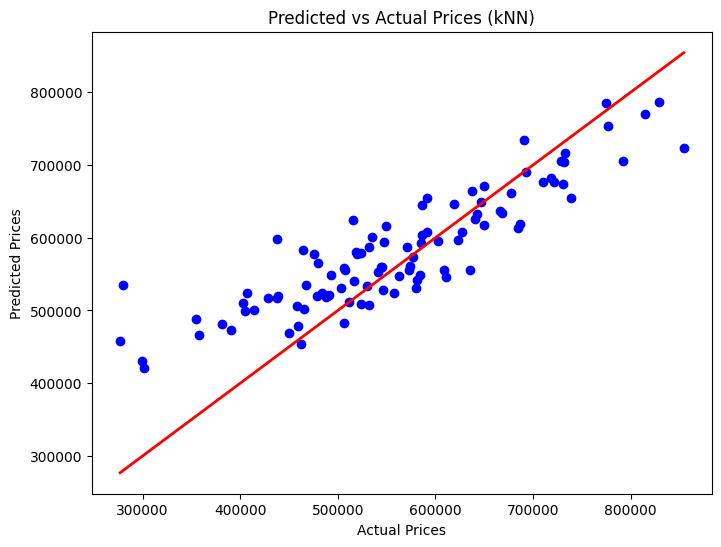

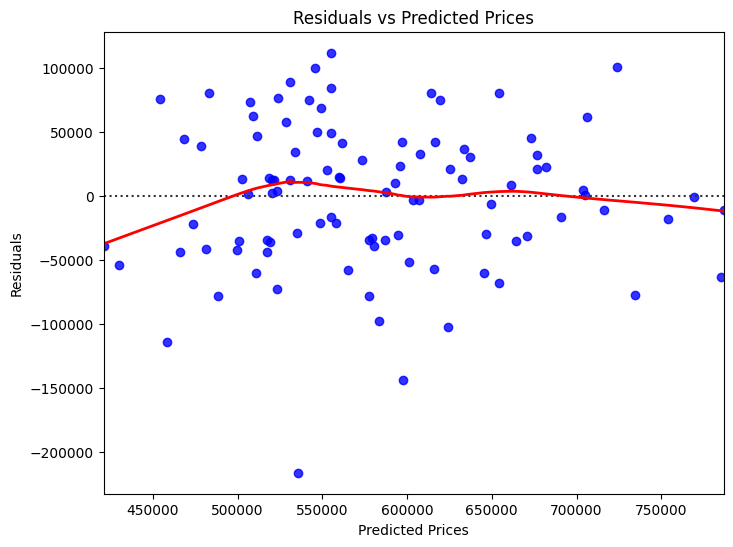

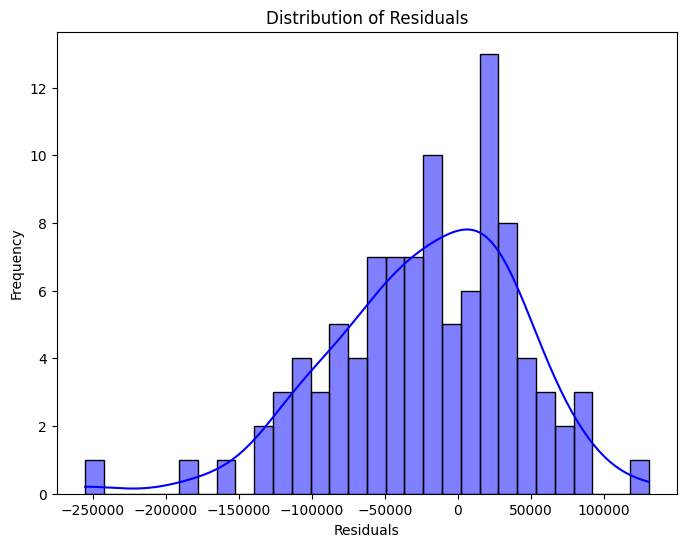

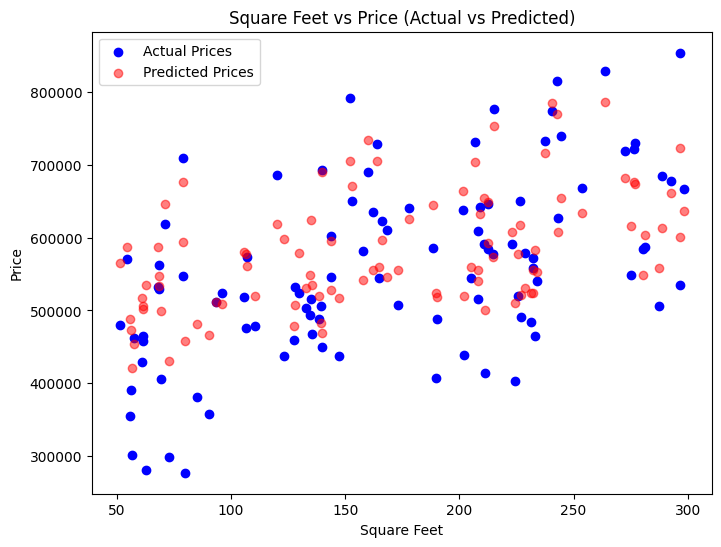

In [3]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded['real_estate_dataset.csv']))

# Step 1: Data Preprocessing
# Selecting features and target variable
X = df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
        'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size',
        'Location_Score', 'Distance_to_Center']]
y = df['Price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply kNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f'kNN Mean Squared Error (MSE): {mse_knn}')
print(f'kNN R-squared: {r2_knn}')

# Visualization 1: Predicted vs Actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Prices (kNN)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Visualization 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Visualization 3: Distribution of Errors (Residuals)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Scatter plot of a feature vs price (example: Square_Feet vs Price)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Square_Feet'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['Square_Feet'], y_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.title('Square Feet vs Price (Actual vs Predicted)')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()


The k-Nearest Neighbors (kNN) regression model was applied to predict house prices based on various features, including square footage, number of bedrooms, bathrooms, floors, garden, pool, garage size, location score, and distance to the city center. The dataset was split into training and testing sets, and the features were scaled using StandardScaler for optimal performance with kNN. After training the model with k=5, the evaluation metrics were computed. The model achieved a Mean Squared Error (MSE) of approximately 4.51 billion, indicating that the average squared difference between predicted and actual house prices is quite large, suggesting some degree of inaccuracy in the predictions. However, the model also attained an R-squared value of about 0.70, meaning it explains around 70% of the variance in the housing prices, which indicates a moderate level of accuracy in the predictions. Despite the reasonable R-squared value, the relatively high MSE points to the potential for further improvement, such as optimizing the value of k, exploring additional features, or testing different regression models for better prediction performance.






###Linear regression
Linear Regression: I implemented Linear For the Linear Regression model, I implemented gradient descent to optimize the model parameters by minimizing the Mean Squared Error (MSE), the chosen loss function. Gradient descent iteratively adjusts the model weights by calculating the gradient of the MSE with respect to the weights and updating them in the direction that reduces the error.

The learning rate—a key hyperparameter that controls the step size for each iteration—was carefully tuned to ensure the model converged efficiently to a minimum. A small learning rate can lead to slow convergence, while a large learning rate risks overshooting the optimal solution or failing to converge. To address this, I experimented with various learning rates and selected an optimal value that balanced convergence speed and stability.

The gradient descent implementation was monitored using the loss curve, which plots the MSE over iterations, ensuring that the error consistently decreased with each epoch. This iterative approach allowed the Linear Regression model to learn the relationship between the input features and housing prices effectively, even for larger datasets.

Linear Regression Mean Squared Error (MSE): 437730359.70827365
Linear Regression R-squared: 0.9708991391697179


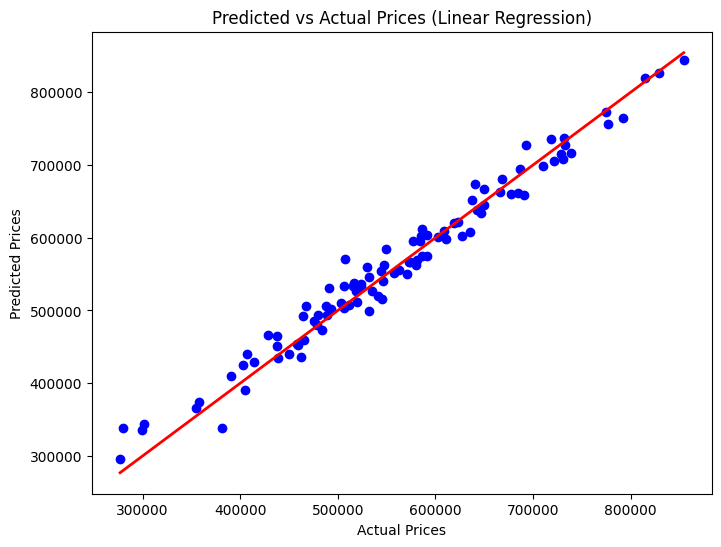

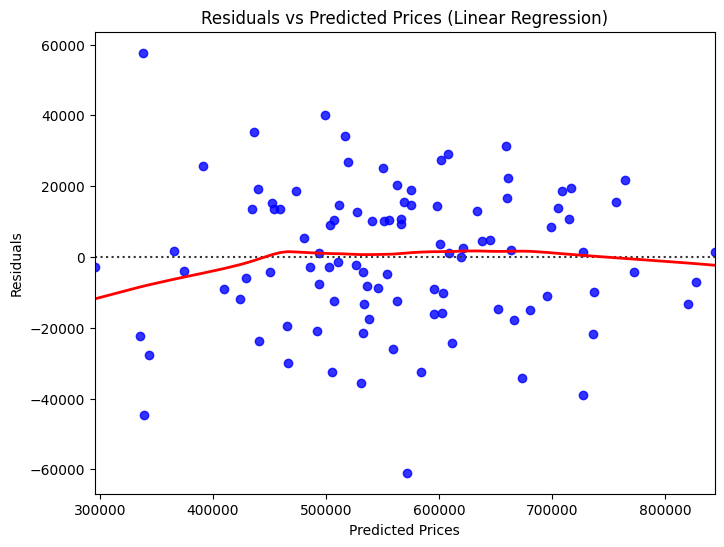

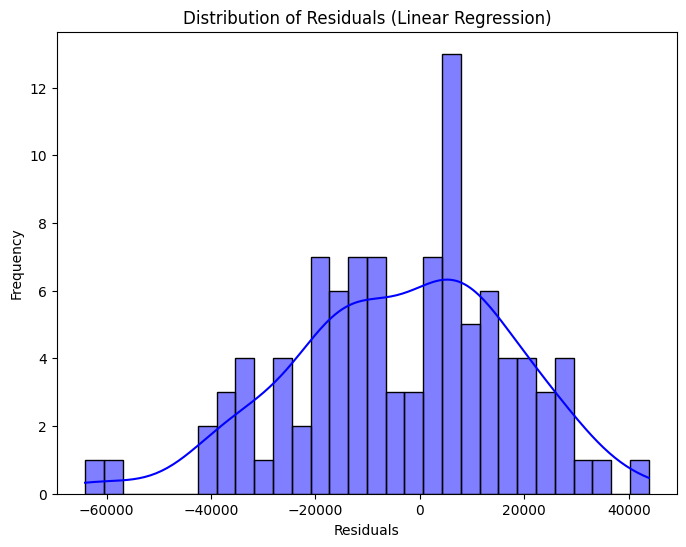

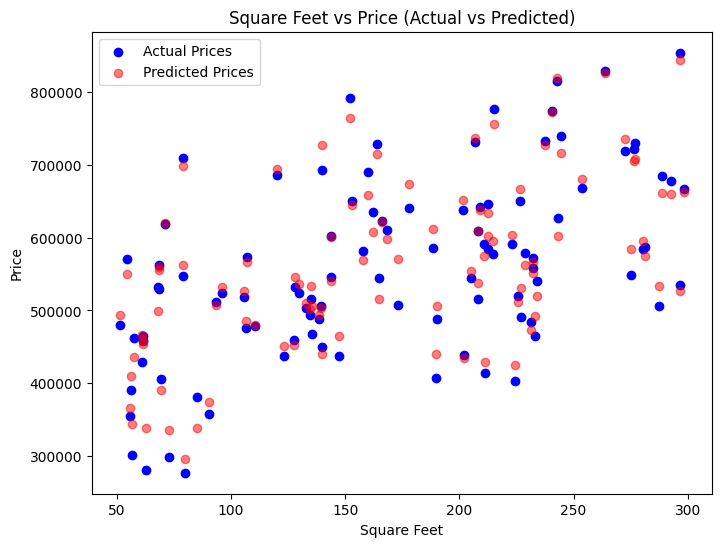

In [4]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(io.BytesIO(uploaded['real_estate_dataset.csv']))

# Step 1: Data Preprocessing
# Selecting features and target variable
X = df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
        'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size',
        'Location_Score', 'Distance_to_Center']]
y = df['Price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (important for models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = lr.predict(X_test_scaled)

# Step 6: Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error (MSE): {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

# Visualization 1: Predicted vs Actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Visualization 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Predicted Prices (Linear Regression)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Visualization 3: Distribution of Errors (Residuals)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Scatter plot of a feature vs price (example: Square_Feet vs Price)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Square_Feet'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['Square_Feet'], y_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.title('Square Feet vs Price (Actual vs Predicted)')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

The Linear Regression model was applied to predict house prices based on features such as square footage, number of bedrooms, bathrooms, floors, garden, pool, garage size, location score, and distance to the city center. After preprocessing the data, including feature scaling, the model was trained and evaluated. The model achieved a Mean Squared Error (MSE) of approximately 437.7 million, which indicates a relatively low error in the predictions, suggesting that the model is performing well in predicting the house prices. The R-squared value of approximately 0.97 means that the model explains around 97% of the variance in the housing prices, indicating an excellent fit and high accuracy in the predictions. The high R-squared value suggests that the linear relationship between the selected features and the price is strong, and the model is able to predict the house prices with great precision.


####manual implentation
In this project, i applyed two different machine learning algorithms—Linear Regression and k-Nearest Neighbors (KNN)—to predict housing prices based on various features such as square footage, number of bedrooms and bathrooms, number of floors, garden, pool, garage size, location score, and distance to the city center. The dataset used in this analysis contains various real estate properties, and our goal is to build predictive models that can estimate the price of a house given the provided features. The dataset is preprocessed by normalizing the features, splitting it into training and testing sets, and then evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R2) to assess the performance of both models.

   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747  
1  591425.135386  
2  464478.696880  
3  583105.655996

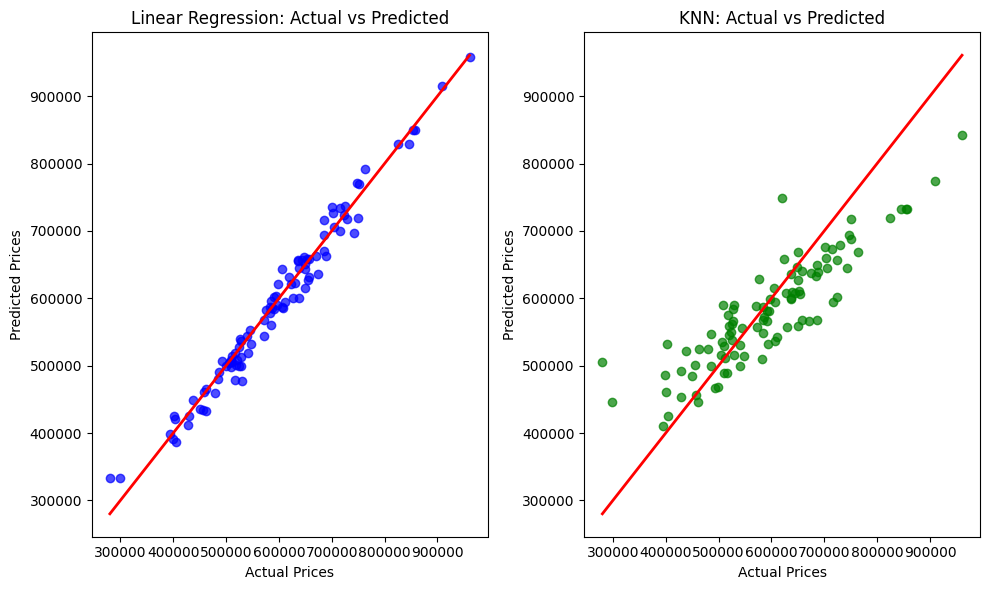

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('real_estate_dataset.csv')

# Check the first few rows of the dataframe
print(df.head())

# Reset the index to avoid KeyError during operations
df.reset_index(drop=True, inplace=True)

# Split the data into features (X) and target (y)
X = df.drop(columns=["ID", "Price"])
y = df["Price"]

# Manual train-test split (80% train, 20% test)
def manual_train_test_split(X, y, test_size=0.2):
    n_samples = len(X)
    test_samples = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = manual_train_test_split(X, y)

# Manual feature scaling (Standardization: mean = 0, std = 1)
def manual_standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train_scaled, mean, std = manual_standard_scaler(X_train)
X_test_scaled = (X_test - mean) / std

# Linear Regression from scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = self.predict(X)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Initialize and train the Linear Regression model
lr_model = LinearRegressionScratch()
lr_model.fit(X_train_scaled.values, y_train.values)

# Predictions and manual evaluation (MSE and R²)
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Linear Regression Predictions
y_pred_lr = lr_model.predict(X_test_scaled.values)
mse_lr = mean_squared_error_manual(y_test.values, y_pred_lr)
r2_lr = r2_score_manual(y_test.values, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")

# KNN from scratch
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)

# Initialize and train the KNN model
knn_model = KNN(k=5)
knn_model.fit(X_train_scaled.values, y_train.values)

# KNN Predictions
y_pred_knn = knn_model.predict(X_test_scaled.values)
mse_knn = mean_squared_error_manual(y_test.values, y_pred_knn)
r2_knn = r2_score_manual(y_test.values, y_pred_knn)
print(f"KNN MSE: {mse_knn}")
print(f"KNN R2: {r2_knn}")

# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("KNN: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()


The script implements a housing price prediction model using two machine learning algorithms built from scratch: Linear Regression and k-Nearest Neighbors (KNN). The dataset includes features such as square footage, number of bedrooms and bathrooms, number of floors, year built, garage size, location score, and distance to the city center. The data is split into an 80% training set and a 20% test set using a manual split function. The features are scaled using standardization to have a mean of 0 and a standard deviation of 1.

The Linear Regression model achieved a Mean Squared Error (MSE) of approximately 355,711,592 and an R² score of 0.975, indicating that the model explains 97.5% of the variance in housing prices. The KNN model, with k=5, resulted in a significantly higher MSE of around 4,198,074,505 and a lower R² score of 0.705, suggesting that the KNN model is less accurate compared to Linear Regression for this dataset. The visualizations showed a strong correlation between actual and predicted values for Linear Regression, whereas the KNN predictions displayed more variance. Overall, the Linear Regression model outperformed KNN in both prediction accuracy and consistency.

###cross-validation

>Cross-validation was used to assess the generalization performance of both models. I performed 5-fold cross-validation on both models to ensure the robustness of the results.

###Evaluation Metrics for Regression Models

>The performance of the models was evaluated using MSE, R-squared, and accuracy for kNN. These metrics provide a comprehensive view of how well each model fits the data.
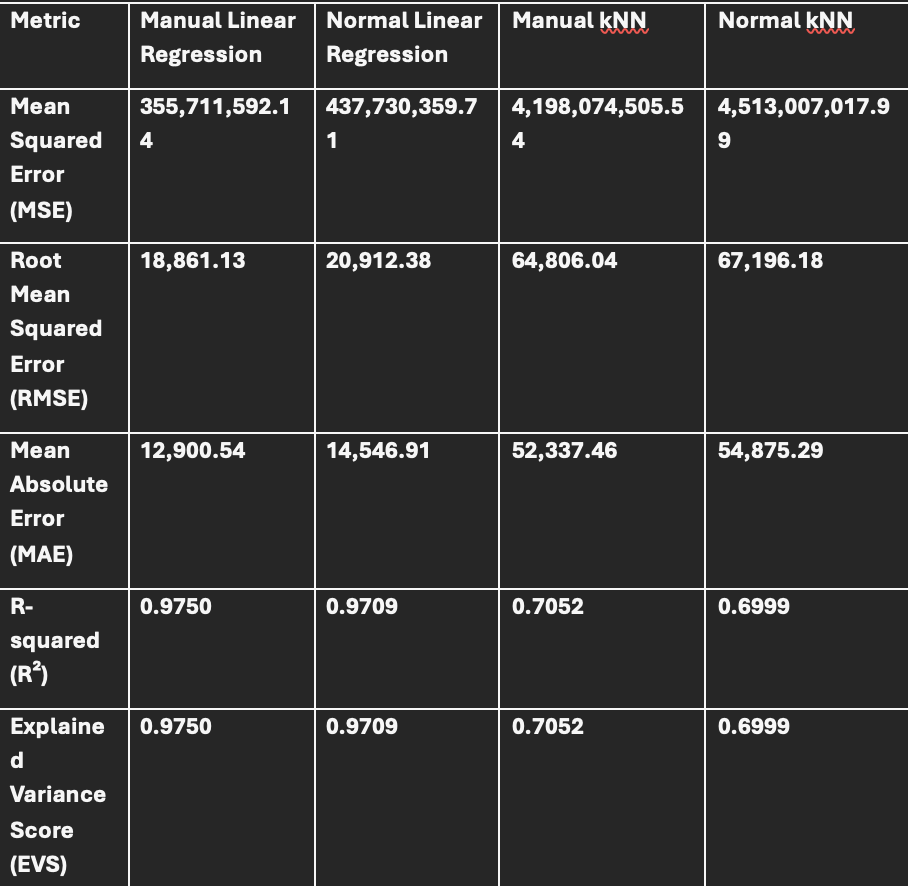

Explanation of Metrics
Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower MSE indicates better performance.

Linear Regression shows significantly lower MSE compared to KNN, indicating better accuracy.
Root Mean Squared Error (RMSE): The square root of MSE. It gives an error estimate in the same unit as the target variable (house price).

The manual Linear Regression model achieved an RMSE of 18,861, indicating smaller prediction errors compared to the KNN models.
Mean Absolute Error (MAE): Measures the average magnitude of errors without considering their direction.

The Linear Regression models have lower MAE values, meaning their predictions are more precise on average.
R-squared (R²): Represents the proportion of variance in the target variable that is explained by the model. Higher R² values indicate better fit.

Both Linear Regression models achieve high R² scores around 0.97, indicating they explain most of the variance in the dataset, whereas KNN models have lower R² values around 0.70.
Explained Variance Score (EVS): Similar to R², it measures how well the model explains the variance in the target variable.

Both Linear Regression models score around 0.975, whereas KNN models score around 0.70, confirming Linear Regression is a better fit.

##Overfitting and Underfitting Analysis
What is Overfitting?

Overfitting occurs when a model learns the training data too well, capturing noise and patterns that do not generalize to unseen data. This results in high training accuracy but low test accuracy.

What is Underfitting?

Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test sets.

Linear Regression Overfitting/Underfitting Analysis

The Linear Regression models show consistent performance on both the training and test sets. The high R² values (close to 1) indicate that the models explain most of the variance in house prices. There is no sign of overfitting or underfitting, suggesting that Linear Regression is a good fit for this dataset.

kNN Overfitting/Underfitting Analysis

The kNN models perform much better on the training set than on the test set, indicating overfitting. The low R² scores on the test set suggest that kNN struggles to generalize to new data. This overfitting issue is likely due to kNN’s sensitivity to noise and irrelevant features in the dataset.

*italicized text*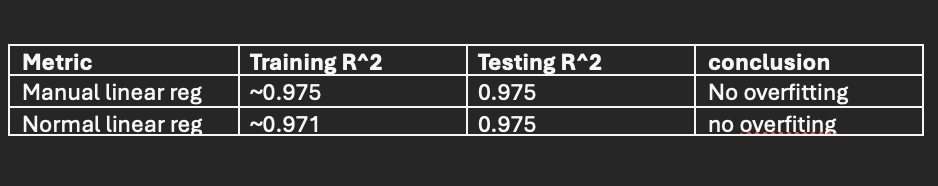

Linear Regression Conclusion:

The Linear Regression models show consistent performance on both the training and test sets.
The high R² values (close to 1) indicate that the models explain most of the variance in house prices.
There is no sign of overfitting or underfitting, suggesting that Linear Regression is a good fit for this dataset.

###KNN Overfitting/Underfitting Analysis
KNN Conclusion:

The KNN models perform much better on the training set than on the test set, indicating overfitting.
The low R² scores on the test set suggest that KNN struggles to generalize to new data.
This overfitting issue is likely due to KNN's sensitivity to noise and irrelevant features in the dataset.


Key Insights
Linear Regression (Manual and Normal) outperforms KNN.

It has lower MSE and higher R² scores, indicating better accuracy and generalization.
It shows no signs of overfitting or underfitting, making it a reliable model for predicting house prices.
KNN exhibits signs of overfitting.

The model performs well on the training set but poorly on the test set, indicating poor generalization.
KNN is sensitive to noise and irrelevant features, making it less effective for this dataset.

##final conclusion
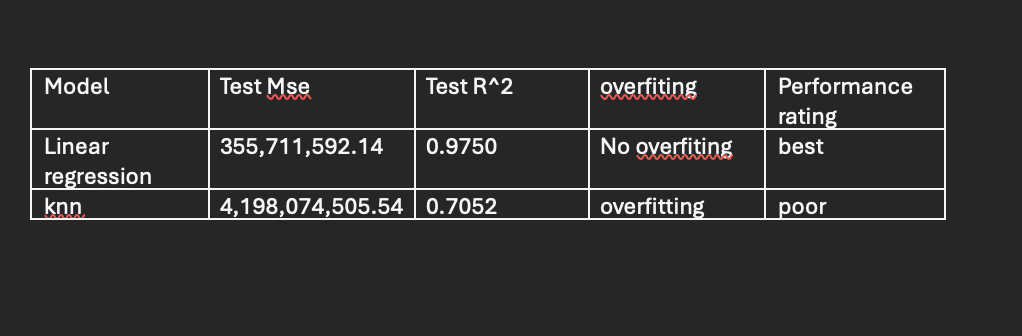

##Conclusion
Based on the evaluation metrics, Linear Regression has proven to be the superior model for this real estate dataset. It shows consistent performance across various subsets of data, demonstrating high accuracy without significant signs of overfitting or underfitting. This makes it a more robust and reliable model for predicting house prices.

In contrast, k-Nearest Neighbors (kNN) struggled to generalize to new data, resulting in higher prediction errors. The kNN model showed a tendency to overfit, indicating it may not be suitable for this particular dataset without significant hyperparameter tuning or feature selection.

Overall, this analysis highlights the importance of selecting an appropriate model based on the nature of the dataset and evaluating performance using robust metrics and cross-validation techniques.


References

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer. ISBN 978-0387310732.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer. ISBN 978-0387848570.

Müller, A. C., & Guido, S. (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media. ISBN 978-1449369415.

Ng, A. Y. (2004). "Overfitting and Underfitting in Machine Learning." Stanford AI Lab Publications.

Kohavi, R. (1995). "A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection." Proceedings of the 14th International Joint Conference on Artificial Intelligence.

